# The structure of Structures

In [1]:
# add path if package not installed
import sys
sys.path.append('../src')

The prisms seen in the quick start are members of `tnsgrt.structure.Structure`. In fact,
`tnsgrt.prism.Prism` overloads only the constructor of `tnsgrt.structure.Structure`, which provides most
of the functionality.

## Construction

Objects of class `tnsgrt.structure.Structure` are composed of *nodes* and *members*. Nodes are `3 x n` numpy arrays

In [2]:
import numpy as np
nodes = np.array([[0,0,0],[0,1,0],[1,1,0],[1,0,0]]).transpose()

Members are *bars* or *strings*, which are specified by a `2 x m` array with the indices of the nodes that define the
members, as in:

In [3]:
members = np.array([[0,1],[1,2],[2,3],[3,0],[0,2],[1,3]]).transpose()

Nodes and members are then combined to build a `tnsgrt.structure.Structure`:

In [4]:
from tnsgrt.structure import Structure
s = Structure(nodes, members, number_of_strings=4)

The parameter `number_of_strings = 4` means that the first four members are to be considered *strings*.

As before, the resulting structure can be plotted using `tnsgrt.plotter.MatplotlibPlotter`

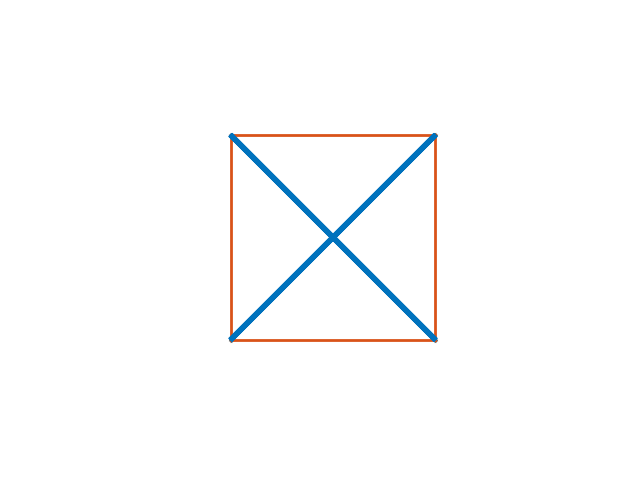

In [5]:
from matplotlib import pyplot as plt
from tnsgrt.plotter.matplotlib import MatplotlibPlotter
%matplotlib widget

plotter = MatplotlibPlotter()
plotter.plot(s)
_, ax = plotter.get_handles()
ax.view_init(90,-90)
ax.axis('off')
ax.axis('equal')
plt.show()

to visualize the resulting planar tensegrity structure built above.

Quite often, it is useful to view and modify the data stored in a Structure. The following
examples show several ways of doing that.

### Nodes and members

A string representation of a Structure displays its number of nodes, number of bars, and number of strings.

In [6]:
print(s)

Structure with 4 nodes, 2 bars and 4 strings


A Structure has as attributes `nodes`

In [7]:
s.nodes

array([[0., 0., 1., 1.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.]])

which is a 3 x n numpy array storing the Structure's nodes in its columns and `members`

In [8]:
s.members

array([[0, 1, 2, 3, 0, 1],
       [1, 2, 3, 0, 2, 3]], dtype=int64)

which is a 2 x m numpy array storing the Structure's members. Each column of `member` stores the indices of the nodes to which the ends of a bar or of a string is connected to.

The values of nodes can be accessed or modified using the convenience methods
:meth:`tnsgrt.structure.Structure.get_node_values` and
:meth:`tnsgrt.structure.Structure.set_node_values`. For example:

In [9]:
s.set_node_values([2, 3], np.array([[2, 1, 0], [2, 0, 0]]).transpose())

modify the location of nodes 2 and 3, and

In [10]:
s.get_node_values([2, 3])

array([[2., 2.],
       [1., 0.],
       [0., 0.]])

retrieves the updated values

The change is reflected in the structure geometry, which now looks as in the new figure generated by the code

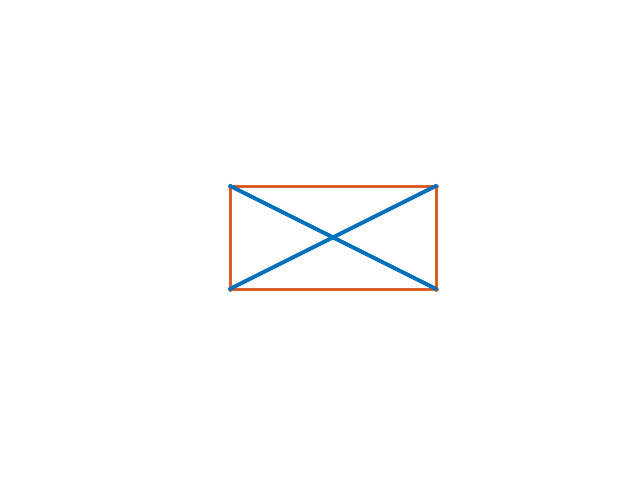

In [11]:
plotter = MatplotlibPlotter()
plotter.plot(s)
_, ax = plotter.get_handles()
ax.view_init(90,-90)
ax.axis('off')
ax.axis('equal')
plt.show()

## Properties

Node and member properties are stored as pandas' Dataframes. In this example

In [12]:
s.node_properties

,radius,visible,constraint,facecolor,edgecolor
0,0.002,True,None,"(0, 0.447, 0.741)","(0, 0.447, 0.741)"
1,0.002,True,None,"(0, 0.447, 0.741)","(0, 0.447, 0.741)"
2,0.002,True,None,"(0, 0.447, 0.741)","(0, 0.447, 0.741)"
3,0.002,True,None,"(0, 0.447, 0.741)","(0, 0.447, 0.741)"


and

In [13]:
s.member_properties

,lambda_,force,stiffness,volume,radius,inner_radius,mass,rest_length,yld,density,modulus,visible,facecolor,edgecolor,linewidth,linestyle
0,0.0,0.0,0.0,0.0,0.005,0.0,1.0,0.0,250000000.0,7850.0,2.000000e+11,True,"(0.85, 0.325, 0.098)","(0.85, 0.325, 0.098)",2,-
1,0.0,0.0,0.0,0.0,0.005,0.0,1.0,0.0,250000000.0,7850.0,2.000000e+11,True,"(0.85, 0.325, 0.098)","(0.85, 0.325, 0.098)",2,-
2,0.0,0.0,0.0,0.0,0.005,0.0,1.0,0.0,250000000.0,7850.0,2.000000e+11,True,"(0.85, 0.325, 0.098)","(0.85, 0.325, 0.098)",2,-
3,0.0,0.0,0.0,0.0,0.005,0.0,1.0,0.0,250000000.0,7850.0,2.000000e+11,True,"(0.85, 0.325, 0.098)","(0.85, 0.325, 0.098)",2,-
4,0.0,0.0,0.0,0.0,0.010,0.0,1.0,0.0,250000000.0,7850.0,2.000000e+11,True,"(0, 0.447, 0.741)","(0, 0.447, 0.741)",2,-
5,0.0,0.0,0.0,0.0,0.010,0.0,1.0,0.0,250000000.0,7850.0,2.000000e+11,True,"(0, 0.447, 0.741)","(0, 0.447, 0.741)",2,-


The DataFrames can be manipulated directly or one can use some convenience methods that will be discussed later.

Properties are populated with default values taken from `Structure.NodeProperty`, `Structure.MemberProperty`, and the values in the dictionary

In [14]:
Structure.member_defaults

{'bar': {'facecolor': (0, 0.447, 0.741), 'edgecolor': (0, 0.447, 0.741)},
 'string': {'facecolor': (0.85, 0.325, 0.098),
  'edgecolor': (0.85, 0.325, 0.098),
  'radius': 0.005}}

The keys in this dictionary are *tags*, which we discuss next.

## Tags

Nodes and members can be assigned and manipulated via *tags*. Nodes do not have any default tag,

In [15]:
s.node_tags

{}

but members are automatically assigned either `bar` or `string` as a tag.

In [16]:
s.member_tags

{'bar': array([4, 5], dtype=int64), 'string': array([0, 1, 2, 3], dtype=int64)}

This association happens at the constructor time by passing the parameter `number_of_strings`, which tags the first `number_of_strings` members as `strings` and the remaining as `bars`. Alternatively, one can pass tags at construction time in the form of a dictionary with tags as keys and a numpy array of node or string indices as values.

It is always recommended to manipulate tags using the convenience methods of `tnsgrt.structure.Structure`, which take care of keeping the member and node indices unique and sorted.

Additional member tags can be assigned using `tnsgrt.structure.Structure.add_member_tag`. For example

In [17]:
s.add_member_tag('vertical', [0, 2])

creates a new tag `vertical` and associated the two members with indices `0` and `2` to it. Conversely, `tnsgrt.structure.Structure.get_members_by_tag` retrieves the member indices associated with a given tag, as in

In [18]:
s.get_members_by_tag('vertical')

array([0, 2])

while `tnsgrt.structure.Structure.get_member_tags` retrieve all tags associated with a given member index:

In [19]:
s.get_member_tags(2)

['string', 'vertical']

Similar methods exist to manipulate node tags.

## Member and node properties

Even though it is possible to manipulate the property `DataFrame`s directly, it is often easier to use the provided convenience methods.

For example

In [20]:
s.get_member_properties(s.get_members_by_tag('vertical'), 'radius', 'facecolor', 'edgecolor')

,radius,facecolor,edgecolor
0,0.005,"(0.85, 0.325, 0.098)","(0.85, 0.325, 0.098)"
2,0.005,"(0.85, 0.325, 0.098)","(0.85, 0.325, 0.098)"


retrieves a view of the member's properties that have `vertical` as a tag.

Conversely

In [21]:
s.set_member_properties(s.get_members_by_tag('vertical'), 'radius', 0.04)

sets the `radius` property of the members that have `vertical`

`tnsgrt.structure.Structure.set_member_properties` can also be used to set multiple values at the same time, as in

In [22]:
from tnsgrt.utils import Colors

s.set_member_properties(s.get_members_by_tag('vertical'),
                        'facecolor', Colors.GREEN.value,
                        'edgecolor', Colors.GREEN.value,
                        'mass', 2)

Retrieving the properties confirm the changes:

In [23]:
s.get_member_properties(s.get_members_by_tag('vertical'), 'radius', 'mass', 'facecolor', 'edgecolor')

,radius,mass,facecolor,edgecolor
0,0.04,2.0,"(0.466, 0.674, 0.188)","(0.466, 0.674, 0.188)"
2,0.04,2.0,"(0.466, 0.674, 0.188)","(0.466, 0.674, 0.188)"


These changes are also reflected on the structure's plot generated by the following code.

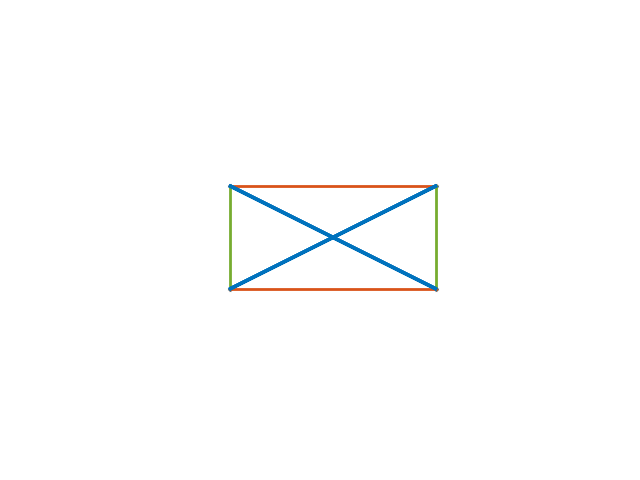

In [24]:
plotter = MatplotlibPlotter()
plotter.plot(s)
fig, ax = plotter.get_handles()
ax.view_init(90,-90)
ax.axis('equal')
ax.axis('off')
plt.show()